## Important EDA Concepts
Exploratory Data Analysis (EDA) is a crucial step in data analysis and involves investigating datasets to summarize their main characteristics, often using visual methods. Here are some important EDA concepts:

### 1. Data Cleaning
Missing Values: Identifying and handling missing values is essential. Techniques include removing rows/columns with missing values, or imputing missing values using statistical methods like mean, median, or mode.
Outliers: Detecting and managing outliers, which can distort analysis results. Outliers can be visualized using boxplots and can be handled by removal, transformation, or capping.
Data Types: Ensuring data types are correct (e.g., numeric, categorical). Incorrect data types can cause issues in analysis and modeling.
### 2. Summary Statistics
Central Tendency: Measures such as mean, median, and mode describe the central point of the data.
Dispersion: Measures such as range, variance, and standard deviation describe the spread of the data.
Shape of Distribution: Skewness and kurtosis provide insights into the shape of the data distribution.
### 3. Data Visualization
Histograms: Used to visualize the distribution of a single numerical variable.
Boxplots: Useful for visualizing the distribution and identifying outliers for a numerical variable across different categories.
Scatter Plots: Show the relationship between two numerical variables.
Heatmaps: Visual representation of data where values are depicted by color. Commonly used to show correlations between variables.
Pairplots: Multiple scatter plots arranged in a matrix to show relationships between multiple variables.
### 4. Correlation Analysis
Correlation Coefficient: Measures the strength and direction of the linear relationship between two variables. Commonly used is Pearson's correlation coefficient.
Correlation Matrix: A table showing correlation coefficients between variables. Useful for identifying relationships and multicollinearity.
### 5. Feature Engineering
Creating New Features: Combining or transforming existing features to create new ones that might be more informative for analysis or modeling.
Scaling and Normalization: Adjusting the range of the data. StandardScaler (z-score normalization) and MinMaxScaler (scaling to a range) are common techniques.
### 6. Bivariate Analysis
Comparing Two Variables: Understanding relationships between two variables using scatter plots, box plots, and correlation coefficients.
Categorical vs. Numerical: Analyzing how numerical variables differ across categories using visualizations like boxplots and bar charts.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno

In [5]:
df=pd.read_csv("modified_diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
773,4.0,83.0,86.0,19.0,0.0,29.3,0.317,34.0,0.0
774,0.0,134.0,58.0,20.0,291.0,26.4,0.352,21.0,0.0
775,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1.0
776,1.0,NaN,50.0,16.0,375.0,25.9,0.655,24.0,0.0
777,0.0,94.0,0.0,0.0,0.0,0.0,0.256,25.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               736 non-null    float64
 1   Glucose                   739 non-null    float64
 2   BloodPressure             738 non-null    float64
 3   SkinThickness             750 non-null    float64
 4   Insulin                   737 non-null    float64
 5   BMI                       740 non-null    float64
 6   DiabetesPedigreeFunction  736 non-null    float64
 7   Age                       739 non-null    float64
 8   Outcome                   737 non-null    float64
dtypes: float64(9)
memory usage: 54.8 KB


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,736.000000,739.000000,738.000000,750.000000,737.000000,740.000000,736.000000,739.000000,737.000000
mean,3.838315,120.956698,69.066396,20.368000,79.876526,32.030946,0.474351,33.098782,0.351425
std,3.389411,31.944621,19.070950,16.035276,114.911661,8.118442,0.337002,11.713945,0.477740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.375000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,129.000000,36.725000,0.629500,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
df['BMI']

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
773    29.3
774    26.4
775     0.0
776    25.9
777     0.0
Name: BMI, Length: 778, dtype: float64

In [14]:
df.columns.str.strip()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
s=pd.Series(['1. Bat.','2. Dog!\n', '3.fox?\t'])
s

0      1. Bat.
1    2. Dog!\n
2     3.fox?\t
dtype: object

In [19]:
s.str.strip('123.!?\n\t')

0     Bat
1     Dog
2     fox
dtype: object

In [15]:
df.isnull().sum()

Pregnancies                 42
Glucose                     39
BloodPressure               40
SkinThickness               28
Insulin                     41
BMI                         38
DiabetesPedigreeFunction    42
Age                         39
Outcome                     41
dtype: int64

In [ ]:
# Replace zero values with NaN for specific columns
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,pd.NA)
df.isnull().sum()

Pregnancies                  42
Glucose                      44
BloodPressure                72
SkinThickness               255
Insulin                     401
BMI                          51
DiabetesPedigreeFunction     42
Age                          39
Outcome                      41
dtype: int64

- We can that by replacing `0` with `NAN`, the numbers of missing is increased in every column

<Axes: >

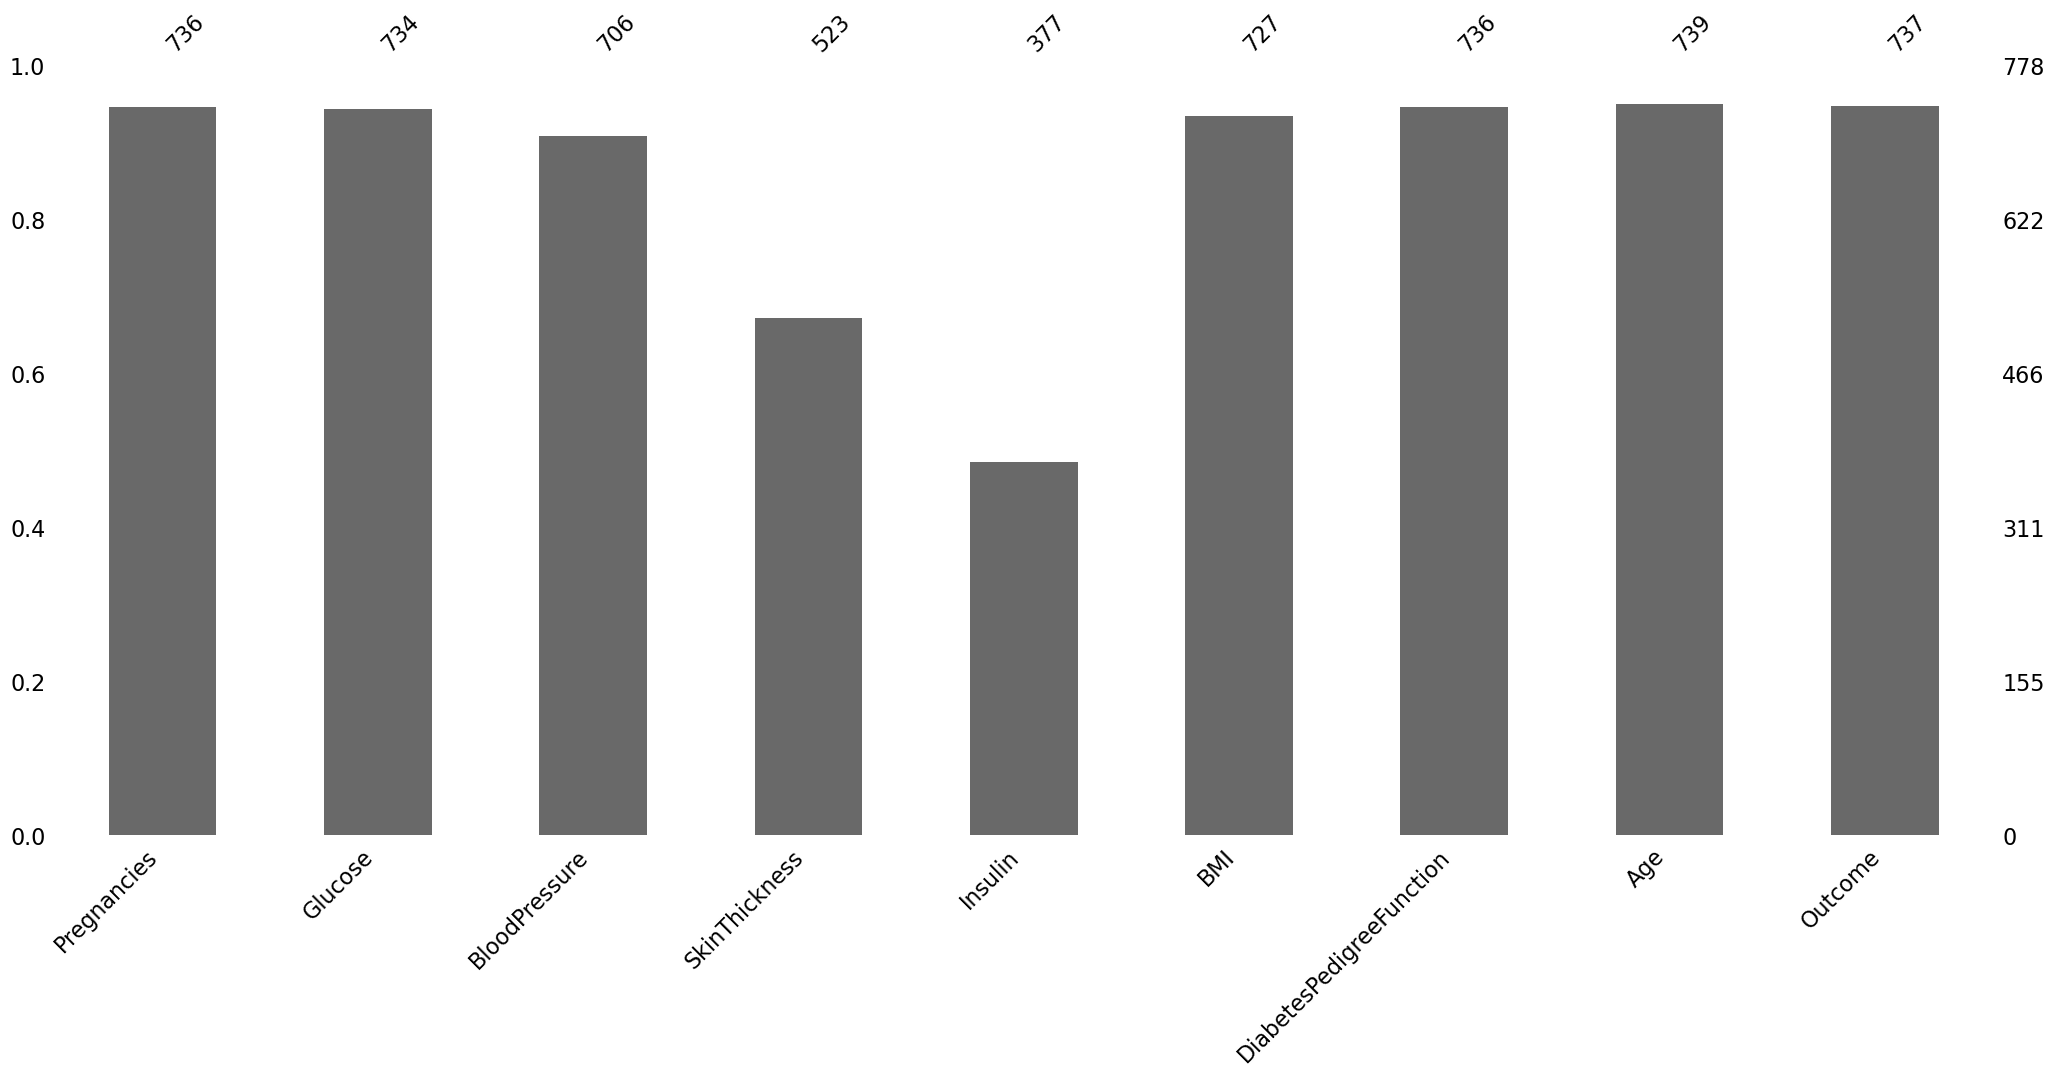

In [24]:
missing_val_bar=msno.bar(df)
missing_val_bar

<Axes: >

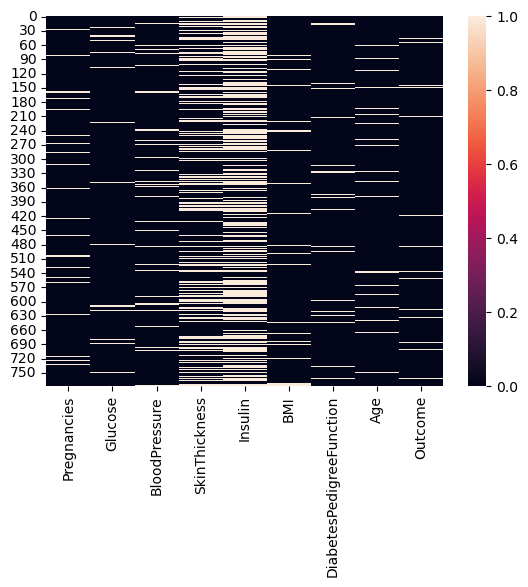

In [28]:
sns.heatmap(df.isnull())


<Axes: >

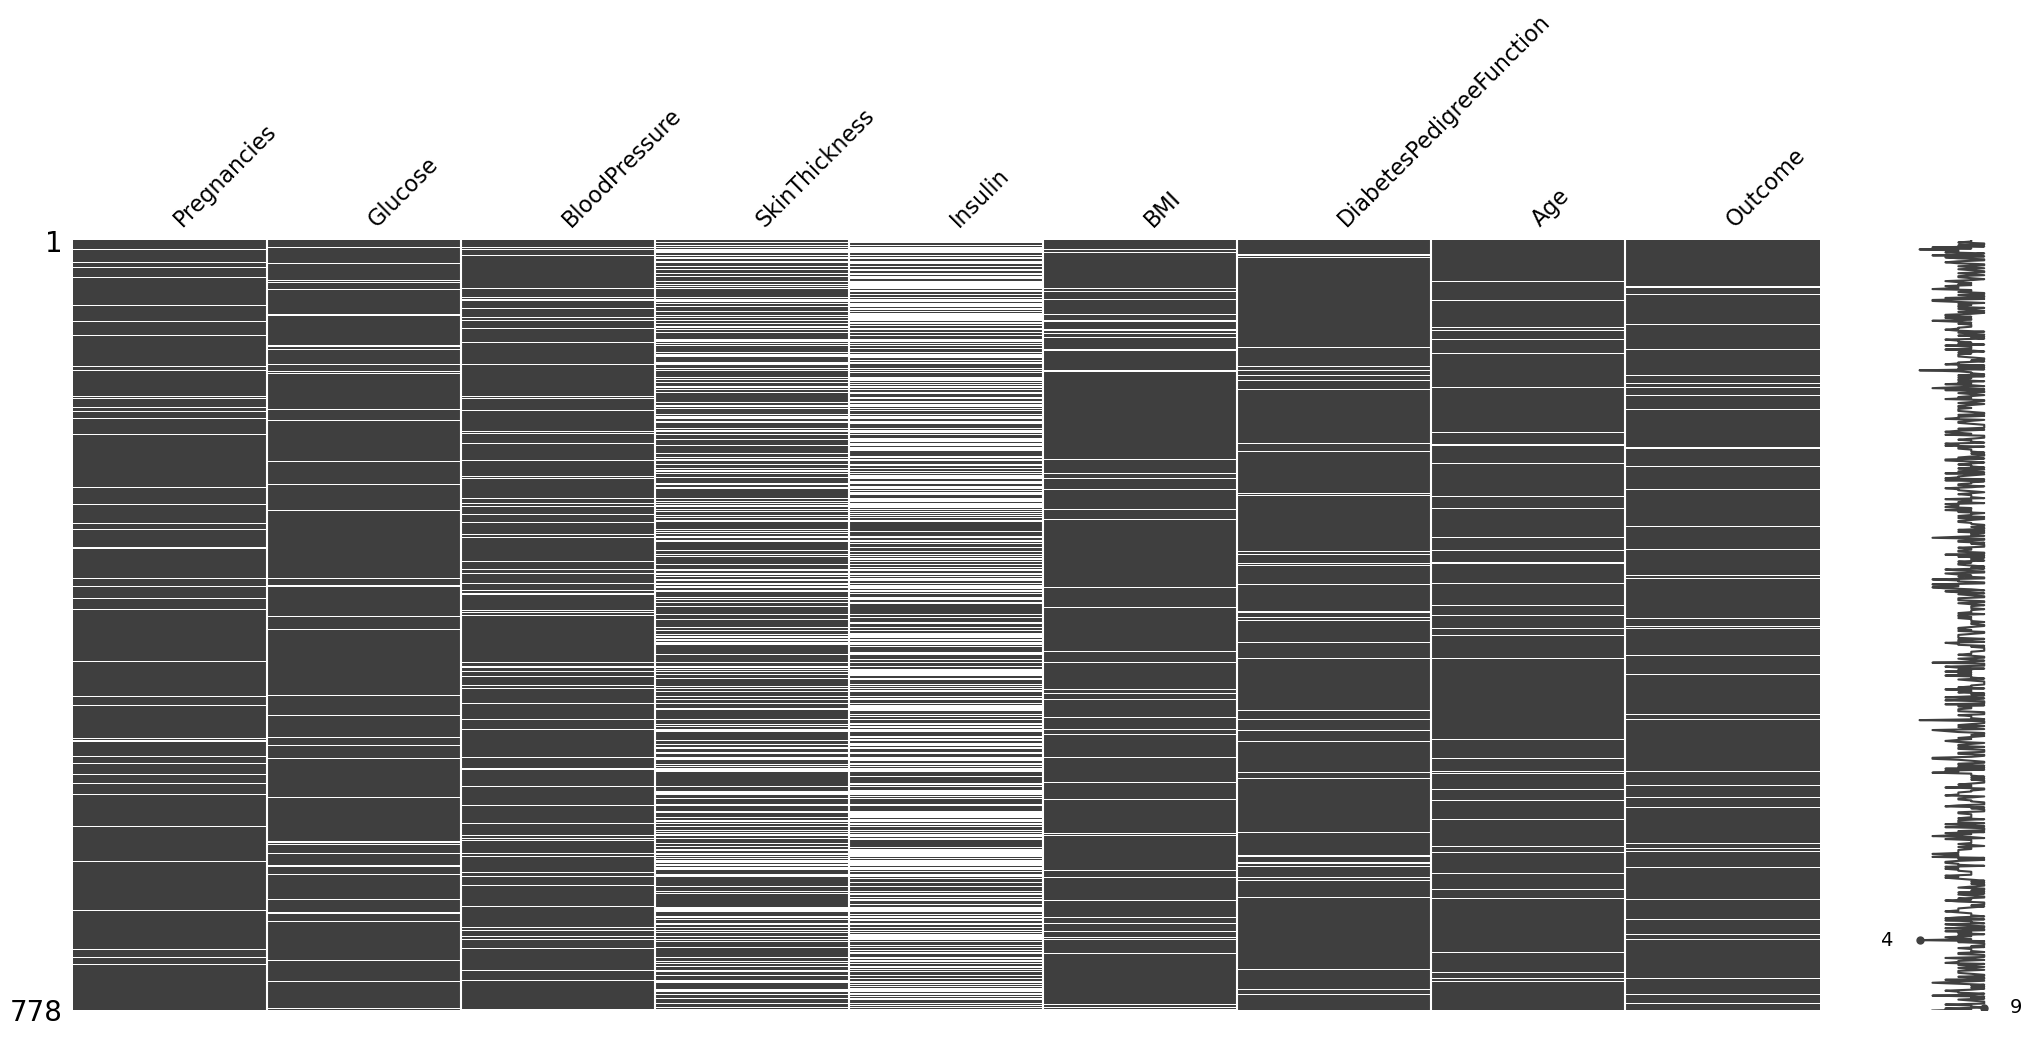

In [32]:
msno.matrix(df)


In [35]:
x=df["Outcome"].mode()
x

0    0.0
Name: Outcome, dtype: float64

In [37]:
# Impute missing values with the mean
df.fillna(df.mean(),inplace=True)


In [38]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [41]:
df['Outcome'].unique()

array([1.        , 0.        , 0.35142469])

In [40]:
df['Outcome']=df['Outcome'].replace(0.35142469,0)

In [45]:
df.duplicated().sum()

0

In [46]:
# Keep the first occurrence of the duplicates
df = df.drop_duplicates(keep='first')

# Print the updated DataFrame
print(df)

     Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
0            6.0  148.000000           72.0      35.000000  156.151194   
1            1.0   85.000000           66.0      29.000000  156.151194   
2            8.0  183.000000           64.0      29.208413  156.151194   
3            1.0   89.000000           66.0      23.000000   94.000000   
4            0.0  137.000000           40.0      35.000000  168.000000   
..           ...         ...            ...            ...         ...   
771          7.0  159.000000           66.0      29.208413  156.151194   
772          0.0  137.000000           40.0      35.000000  168.000000   
773          4.0   83.000000           86.0      19.000000  156.151194   
775          8.0  125.000000           96.0      29.208413  156.151194   
776          1.0  121.780654           50.0      16.000000  375.000000   

           BMI  DiabetesPedigreeFunction   Age   Outcome  
0    33.600000                     0.627  50.0  1.00

In [50]:
df[df['Pregnancies']>10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
24,11.0,143.000000,94.000000,33.000000,146.000000,36.6,0.254000,51.000000,1.000000
28,13.0,145.000000,82.000000,19.000000,110.000000,22.2,0.245000,57.000000,0.000000
36,11.0,138.000000,76.000000,29.208413,156.151194,33.2,0.420000,35.000000,0.000000
72,13.0,126.000000,90.000000,29.208413,156.151194,43.4,0.583000,42.000000,1.000000
86,13.0,106.000000,72.000000,54.000000,156.151194,36.6,0.178000,45.000000,0.000000
88,15.0,136.000000,70.000000,29.208413,110.000000,37.1,0.153000,33.098782,1.000000
159,17.0,163.000000,72.000000,41.000000,156.151194,40.9,0.817000,47.000000,1.000000
193,11.0,135.000000,72.196884,29.208413,156.151194,52.3,0.578000,40.000000,1.000000
215,12.0,151.000000,70.000000,29.208413,271.000000,41.8,0.742000,38.000000,1.000000
254,12.0,92.000000,62.000000,7.000000,258.000000,27.6,0.926000,44.000000,1.000000


In [58]:
# age >30 and glucose is greater than 150
df[(df['Age']>30)|(df['Glucose']>150)]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,156.151194,33.600000,0.627,50.0,1.000000
1,1.0,85.0,66.0,29.000000,156.151194,26.600000,0.351,31.0,0.000000
2,8.0,183.0,64.0,29.208413,156.151194,23.300000,0.672,32.0,1.000000
4,0.0,137.0,40.0,35.000000,168.000000,43.100000,2.288,33.0,1.000000
8,2.0,197.0,70.0,45.000000,156.151194,30.500000,0.158,53.0,1.000000
...,...,...,...,...,...,...,...,...,...
766,1.0,126.0,60.0,29.208413,156.151194,30.100000,0.349,47.0,1.000000
771,7.0,159.0,66.0,29.208413,156.151194,30.400000,0.383,36.0,0.351425
772,0.0,137.0,40.0,35.000000,168.000000,32.603714,2.288,33.0,1.000000
773,4.0,83.0,86.0,19.000000,156.151194,29.300000,0.317,34.0,0.000000


In [59]:
df['BloodPressure'].unique()

array([ 72.        ,  66.        ,  64.        ,  40.        ,
        74.        ,  50.        ,  72.19688385,  70.        ,
        92.        ,  80.        ,  60.        ,  84.        ,
        30.        ,  88.        ,  90.        ,  94.        ,
        76.        ,  82.        ,  75.        ,  58.        ,
        78.        ,  68.        , 110.        ,  56.        ,
        62.        ,  86.        ,  48.        ,  44.        ,
        65.        , 108.        ,  55.        ,  96.        ,
       122.        ,  85.        ,  54.        ,  52.        ,
        98.        , 104.        ,  95.        ,  46.        ,
       102.        , 100.        ,  61.        ,  24.        ,
        38.        , 106.        , 114.        ])

In [60]:
df['BloodPressure'].nunique()

47

In [62]:
df.shape

(774, 9)

In [63]:
df.groupby(['BloodPressure']).mean()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
BloodPressure,,,,,,,,
24.000000,1.000000,89.000000,19.000000,25.000000,27.800000,0.559000,21.000000,0.000000
30.000000,1.000000,103.000000,29.208413,156.151194,43.300000,0.183000,33.000000,0.000000
38.000000,1.000000,109.000000,18.000000,120.000000,32.603714,0.407000,26.000000,0.000000
40.000000,0.000000,137.000000,35.000000,168.000000,37.851857,2.288000,33.000000,1.000000
44.000000,3.250000,110.500000,25.000000,110.787798,28.175000,0.408250,27.000000,0.000000
46.000000,1.500000,133.000000,20.000000,209.000000,31.550000,0.415000,22.000000,0.000000
48.000000,2.000000,104.356131,28.841683,149.460477,33.860743,0.450000,23.800000,0.200000
50.000000,2.000000,119.060050,24.416679,174.596613,28.531055,0.560823,28.853752,0.334725
52.000000,1.983832,113.078065,25.483365,162.875597,31.170000,0.454100,24.900000,0.300000


In [65]:
grouped_mean_age=df.groupby(['Outcome','Age']).mean()
grouped_mean_age

Pregnancies     Glucose  BloodPressure  SkinThickness  \
Outcome Age                                                           
0.0     21.0     1.287777  109.363947      66.807477      24.794136   
        22.0     1.629307  106.409131      65.120343      23.955987   
        23.0     1.602947  107.389331      70.868871      27.639432   
        24.0     2.185462  113.503406      66.466320      28.868069   
        25.0     1.828278   96.605828      65.638308      28.415346   
...                   ...         ...            ...            ...   
1.0     60.0     6.000000  157.500000      70.000000      32.604207   
        61.0     4.000000  146.000000      92.000000      29.208413   
        62.0     1.000000  151.000000      77.000000      64.104207   
        66.0     4.000000  174.000000      91.000000      29.208413   
        67.0     4.000000  146.000000      78.000000      29.208413   

                 Insulin        BMI  DiabetesPedigreeFunction  
Outcome Age                                                    
0.0     21.0  136.169189  29.176835                  0.414732  
        22.0  126.884390  30.090846                  0.420605  
        23.0  166.221383  31.954132                  0.446565  
        24.0  147.586575  32.125206                  0.408204  
        25.0  124.671430  30.329152                  0.494087  
...                  ...        ...                       ...  
1.0     60.0  325.575597  26.950000                  0.446000  
        61.0  156.151194  31.200000                  0.539000  
        62.0  156.151194  31.300000                  0.658000  
        66.0  156.151194  34.051857                  0.541500  
        67.0  156.151194  38.500000                  0.520000  

[115 rows x 7 columns]

In [66]:
df[(df['Age']==22) | (df['Outcome']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1.0,85.000000,66.000000,29.000000,156.151194,26.6,0.351,31.0,0.0
3,1.0,89.000000,66.000000,23.000000,94.000000,28.1,0.167,21.0,0.0
5,5.0,116.000000,74.000000,29.208413,156.151194,25.6,0.201,30.0,0.0
7,10.0,121.780654,72.196884,29.208413,156.151194,35.3,0.134,29.0,0.0
10,4.0,110.000000,92.000000,29.208413,156.151194,37.6,0.191,30.0,0.0
...,...,...,...,...,...,...,...,...,...
765,5.0,121.000000,72.000000,23.000000,112.000000,26.2,0.245,30.0,0.0
767,1.0,93.000000,70.000000,31.000000,156.151194,30.4,0.315,23.0,0.0
768,0.0,102.000000,64.000000,46.000000,78.000000,40.6,0.496,21.0,0.0
773,4.0,83.000000,86.000000,19.000000,156.151194,29.3,0.317,34.0,0.0


In [67]:
df.groupby(df['Outcome']).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0.000000,3.363101,111.382398,70.922639,28.081340,141.823124,31.299424,0.425842,31.494062
0.351425,3.605813,116.997641,69.204726,26.519330,165.687197,30.414996,0.477782,30.985247
1.000000,4.801931,141.731808,75.082680,31.631813,181.233792,35.368002,0.561905,36.499140


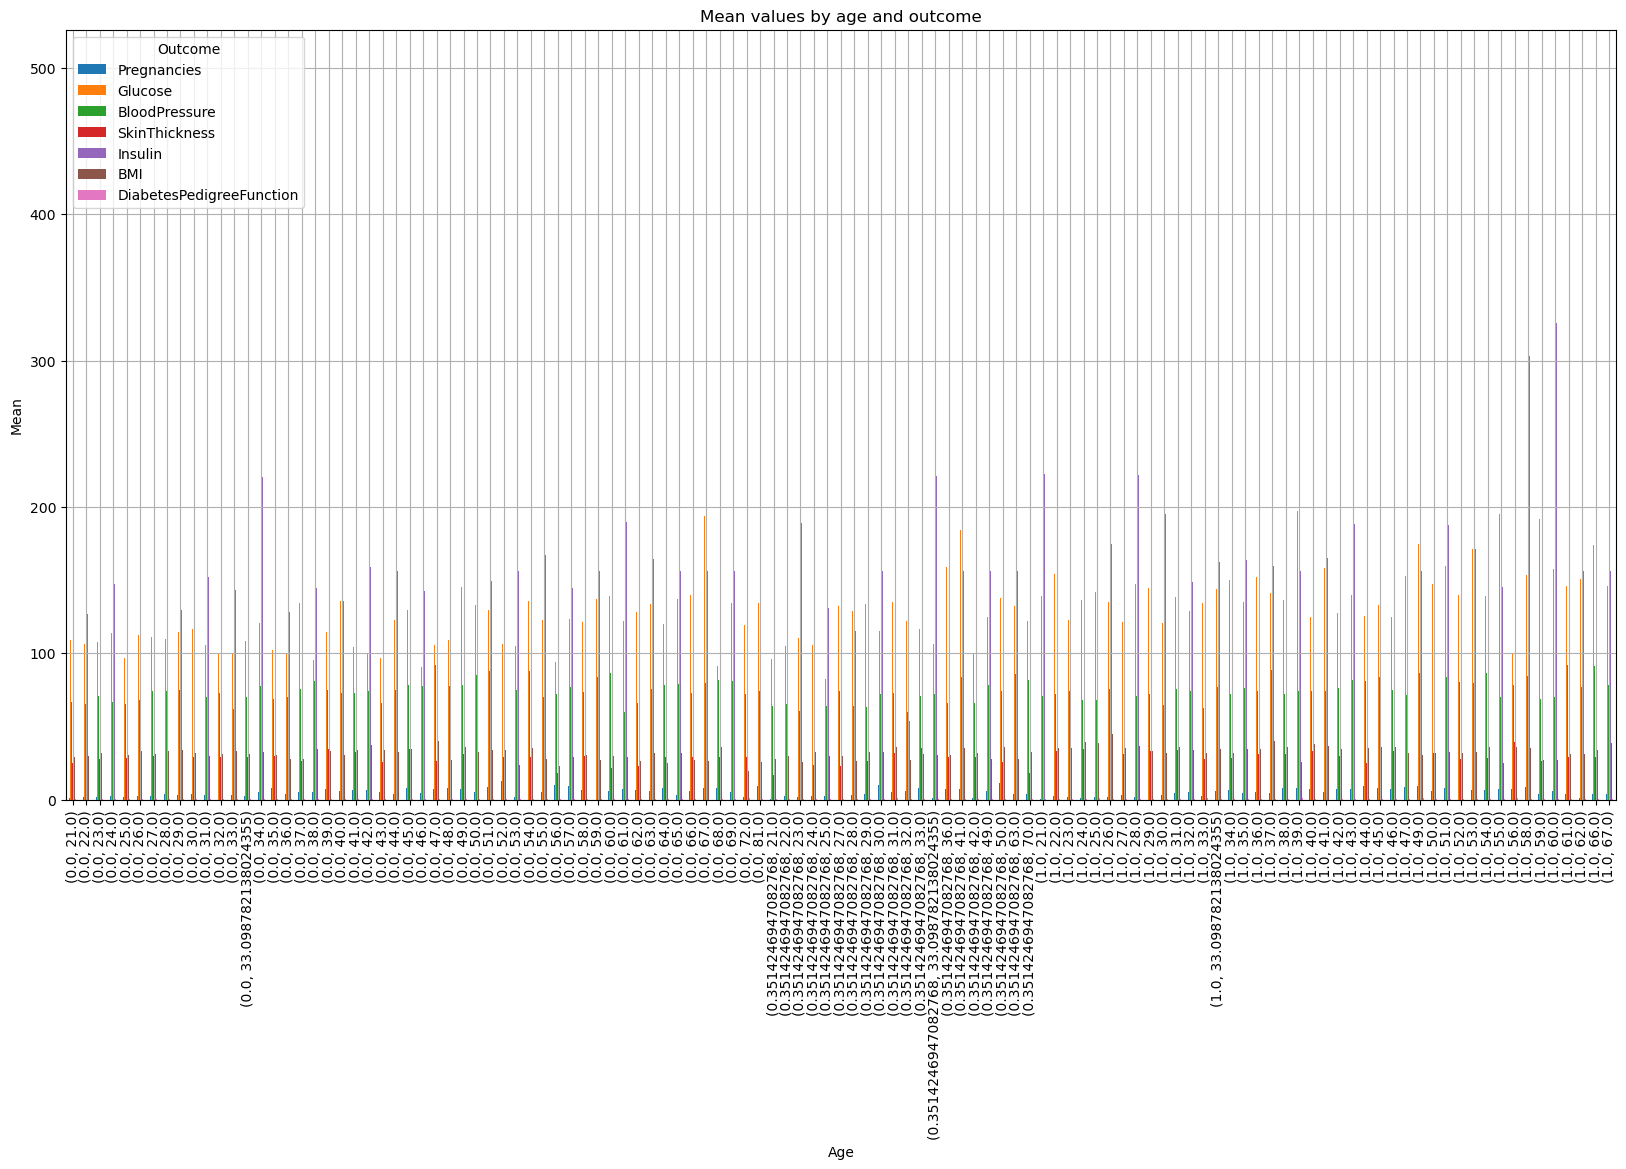

In [71]:
grouped_mean_age.plot(kind='bar',figsize=(20,10))
plt.title("Mean values by age and outcome")
plt.ylabel('Mean')
plt.xlabel("Age")
plt.legend(title='Outcome',loc='best')
plt.grid(True)
plt.show()

In [72]:
df.groupby(['Glucose'])["BMI"].mean()

Glucose
44.0     25.000000
57.0     27.250000
61.0     34.400000
65.0     32.000000
67.0     45.300000
           ...    
195.0    28.000000
196.0    37.933333
197.0    31.950000
198.0    41.300000
199.0    42.900000
Name: BMI, Length: 134, dtype: float64

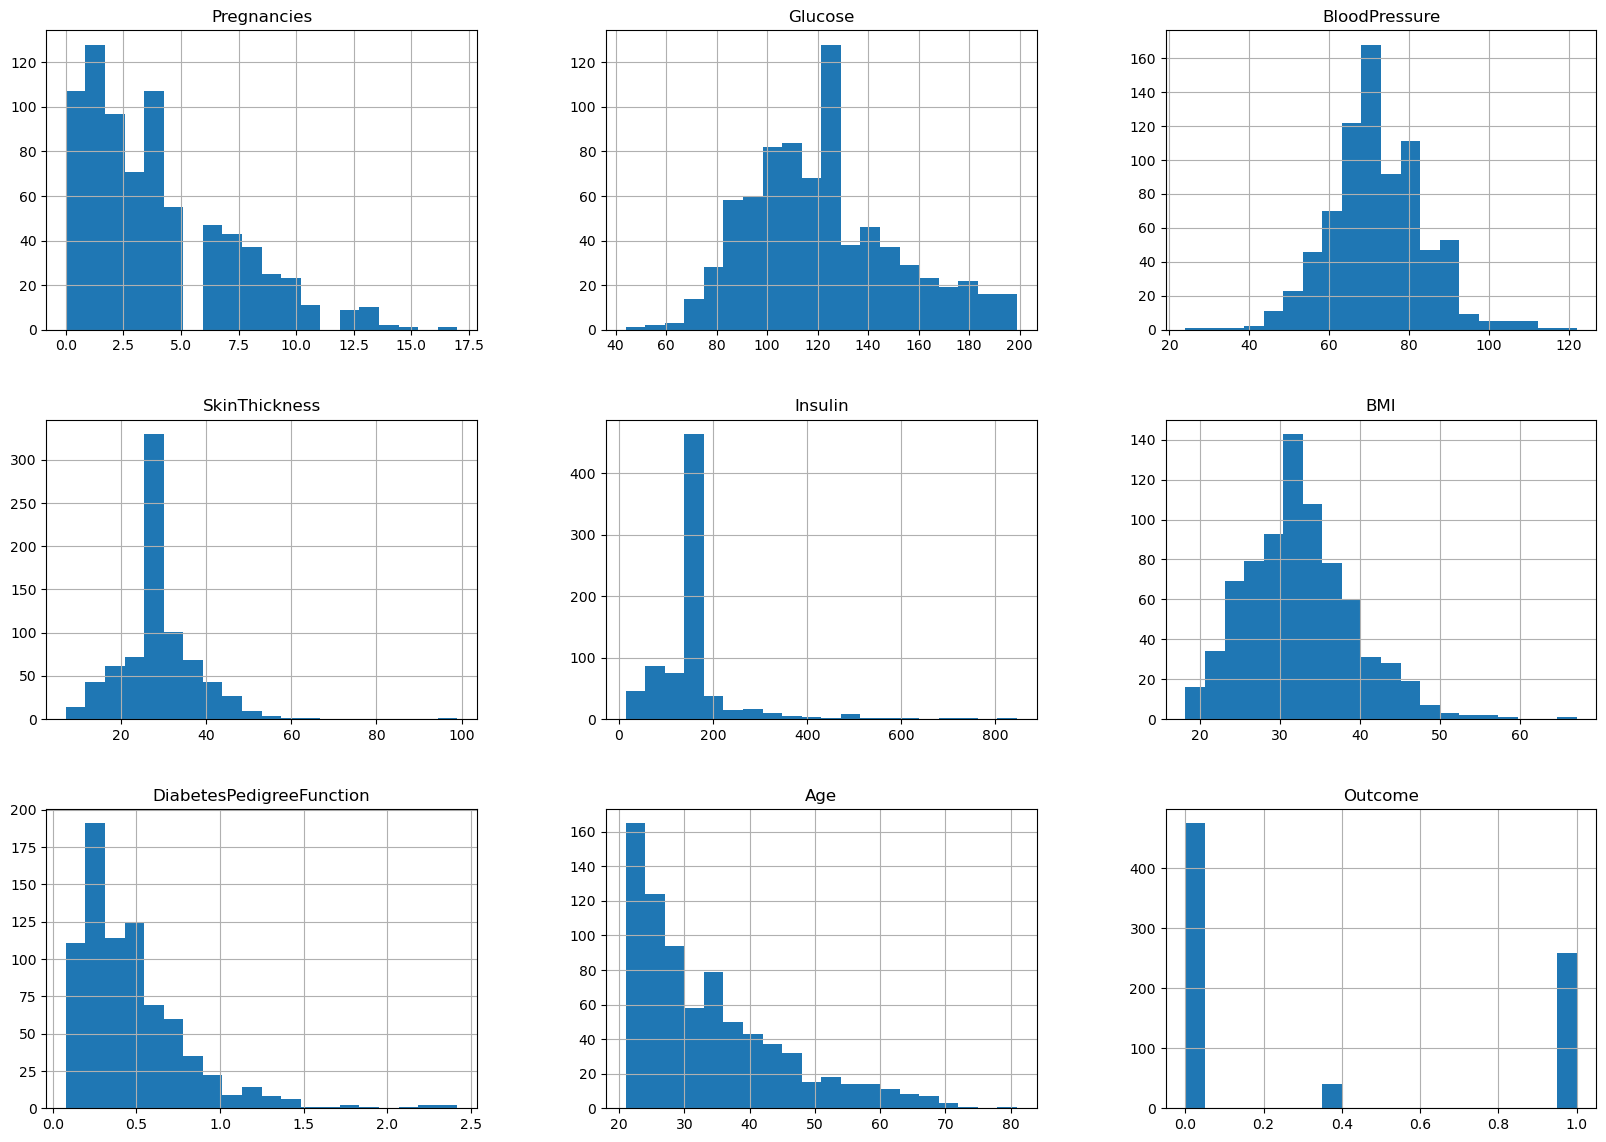

In [73]:
df.hist(bins=20,figsize=(20,14))
plt.show()

<Axes: >

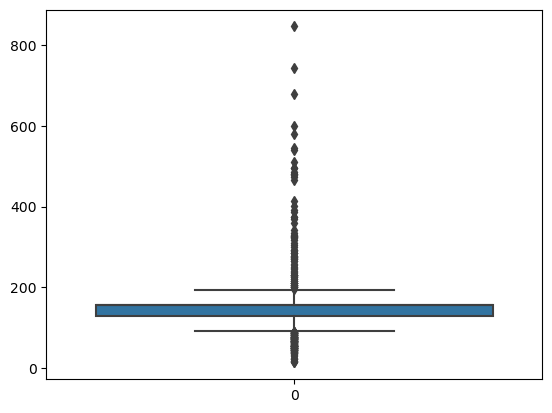

In [74]:
sns.boxplot(df['Insulin'])

<Axes: >

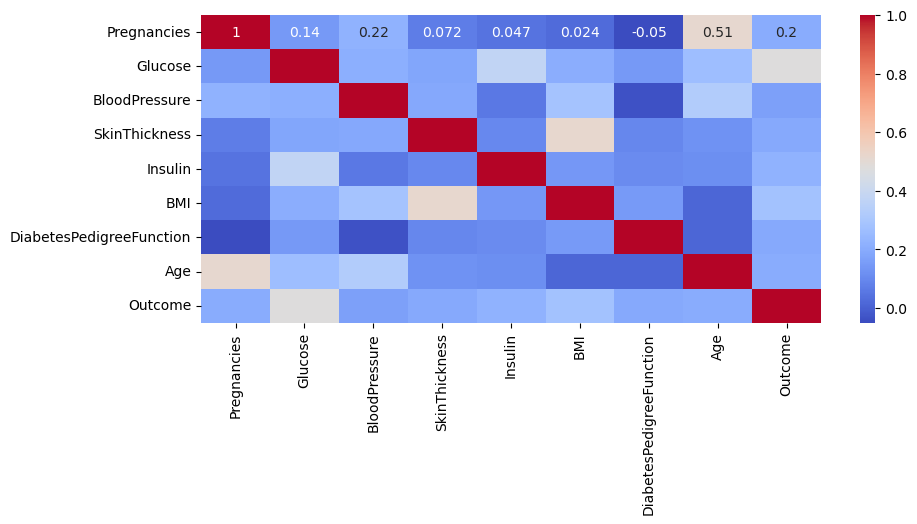

In [80]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

/Users/husnainmalik/miniconda3/envs/python_eda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/husnainmalik/miniconda3/envs/python_eda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/husnainmalik/miniconda3/envs/python_eda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/husnainmalik/miniconda3/envs/python_eda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: F

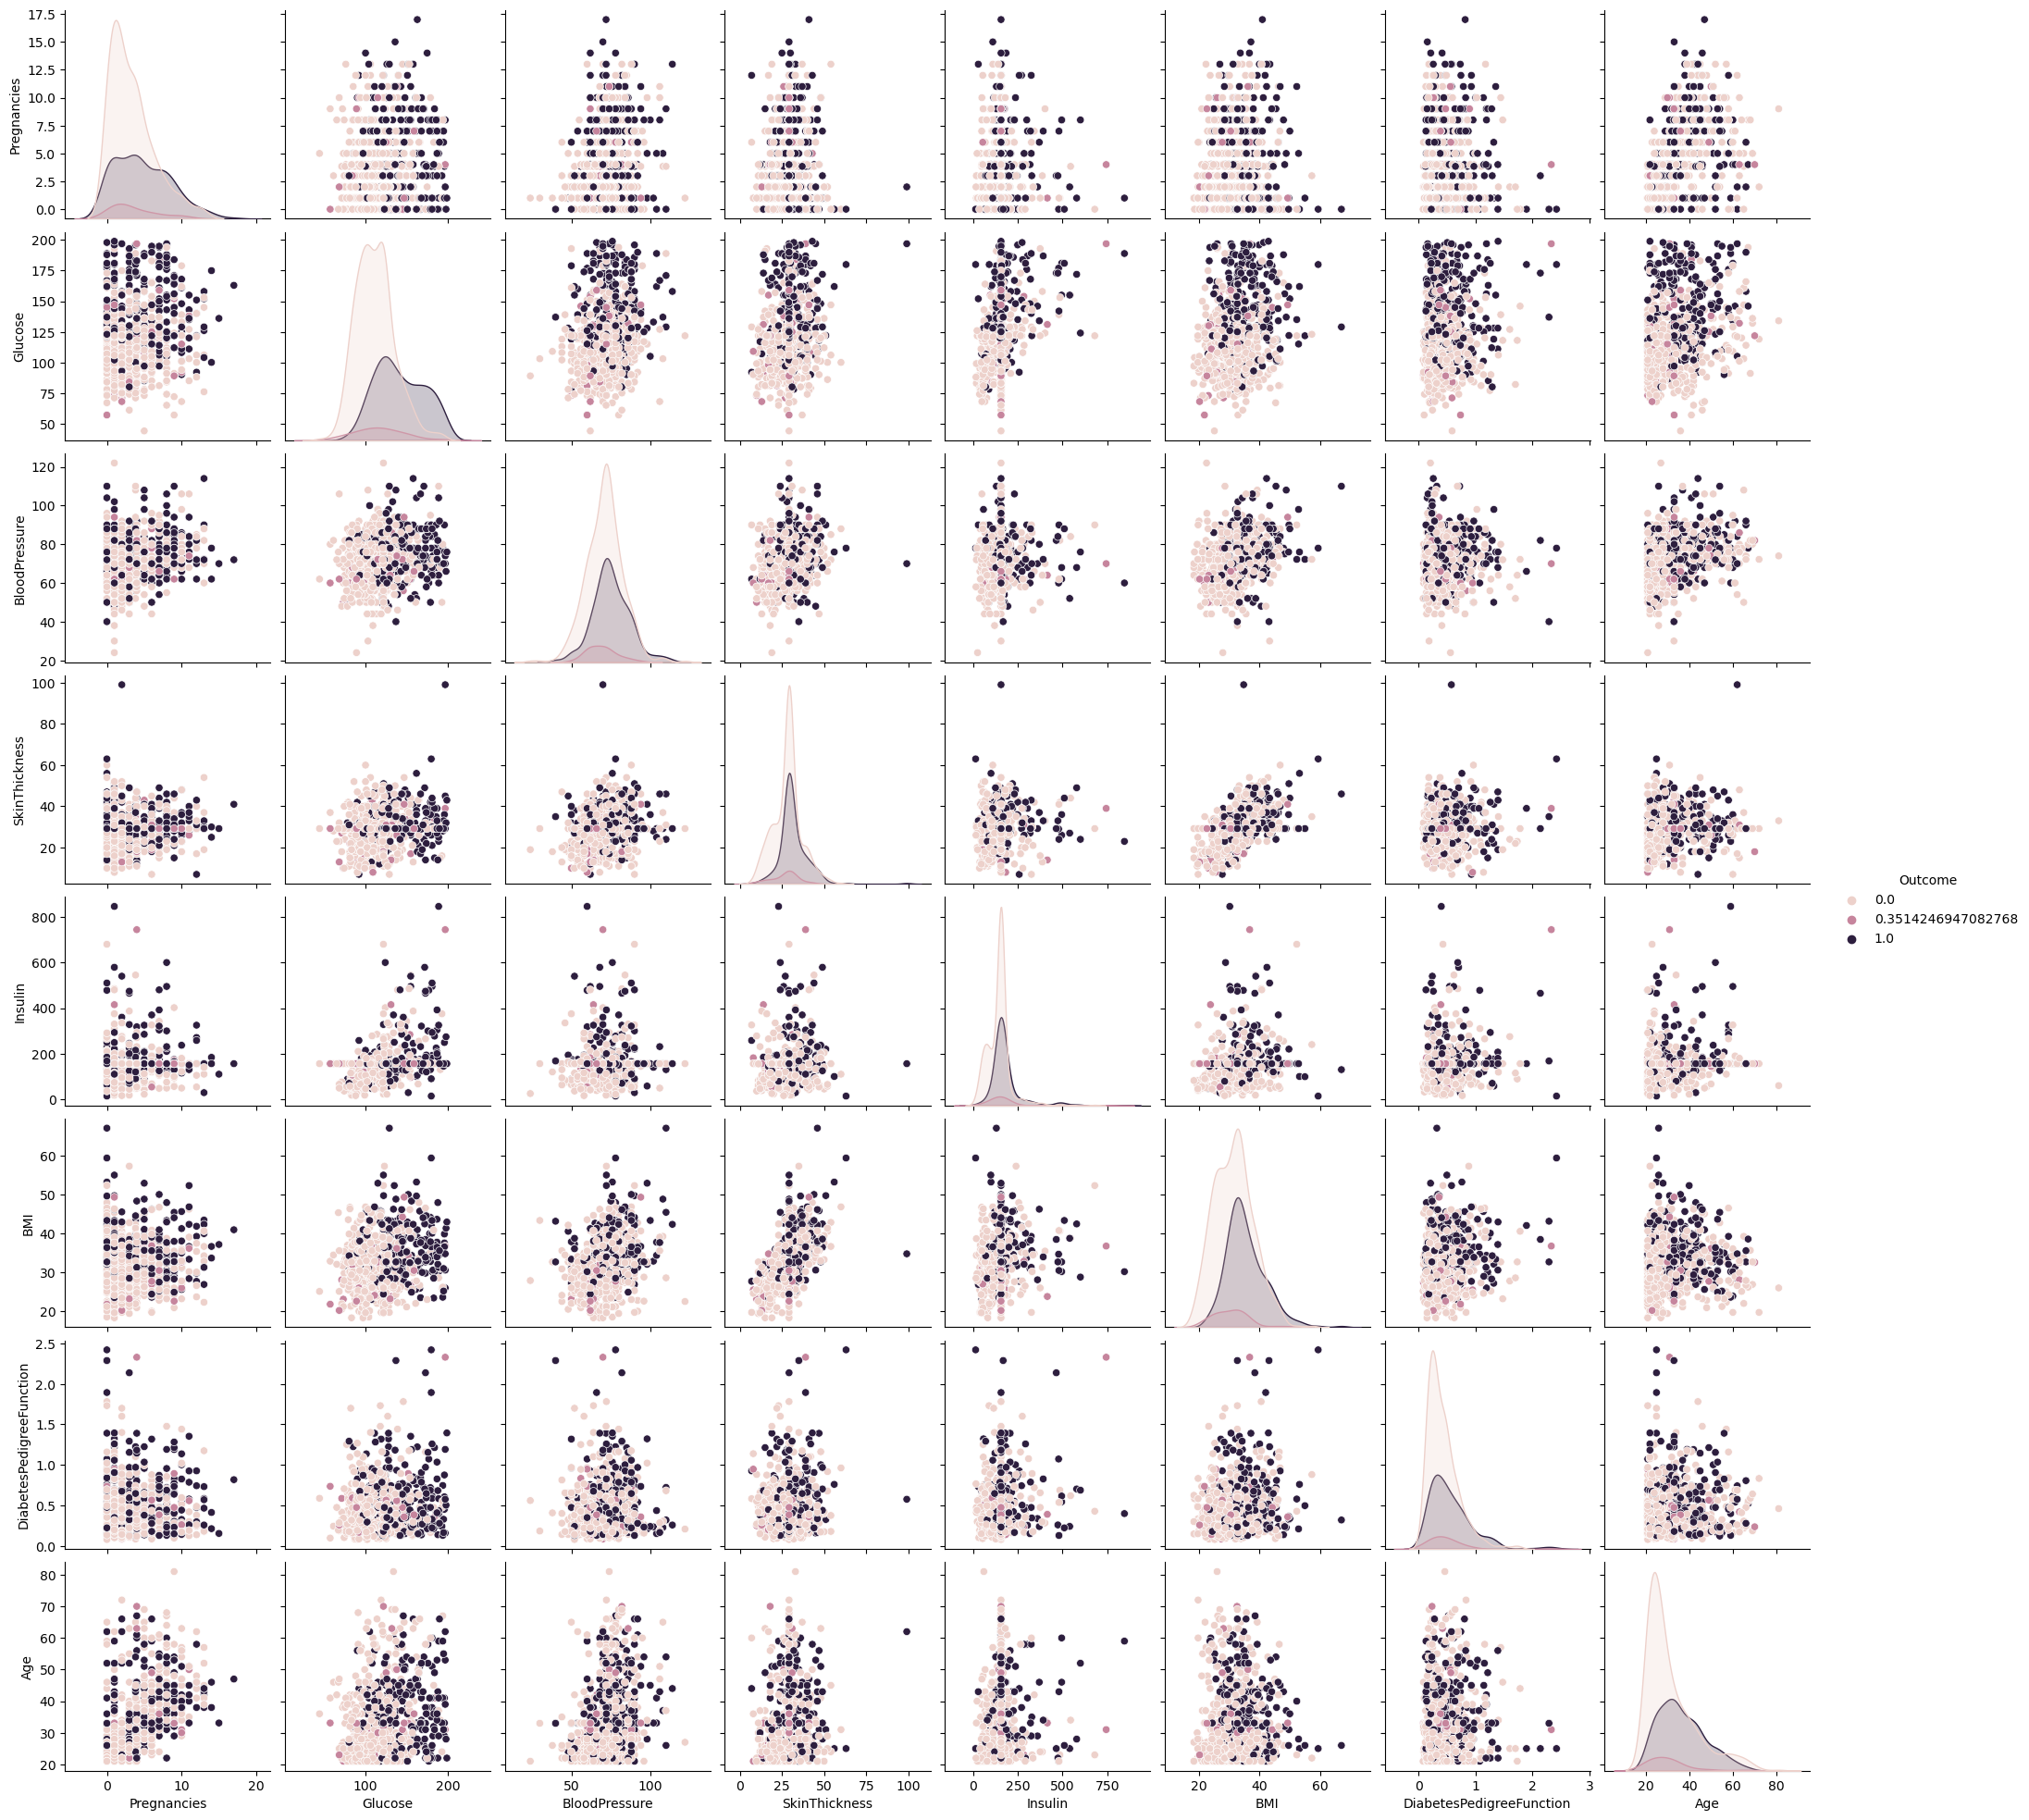

In [81]:
sns.pairplot(df,hue='Outcome',diag_kind='kde')
plt.show()

In [82]:
# create a new feature
df['Age_BMI']=df['Age']*df['BMI']
df['Age_BMI']

0      1680.000000
1       824.600000
2       745.600000
3       590.100000
4      1422.300000
          ...     
771    1094.400000
772    1075.922558
773     996.200000
775    1760.600550
776     621.600000
Name: Age_BMI, Length: 774, dtype: float64

In [83]:
df['BMI groups']=pd.qcut(df['BMI'],q=4)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_BMI,BMI groups
0,6.0,148.000000,72.0,35.000000,156.151194,33.600000,0.627,50.0,1.000000,1680.000000,"(32.604, 36.5]"
1,1.0,85.000000,66.0,29.000000,156.151194,26.600000,0.351,31.0,0.000000,824.600000,"(18.198999999999998, 27.8]"
2,8.0,183.000000,64.0,29.208413,156.151194,23.300000,0.672,32.0,1.000000,745.600000,"(18.198999999999998, 27.8]"
3,1.0,89.000000,66.0,23.000000,94.000000,28.100000,0.167,21.0,0.000000,590.100000,"(27.8, 32.604]"
4,0.0,137.000000,40.0,35.000000,168.000000,43.100000,2.288,33.0,1.000000,1422.300000,"(36.5, 67.1]"
...,...,...,...,...,...,...,...,...,...,...,...
771,7.0,159.000000,66.0,29.208413,156.151194,30.400000,0.383,36.0,0.351425,1094.400000,"(27.8, 32.604]"
772,0.0,137.000000,40.0,35.000000,168.000000,32.603714,2.288,33.0,1.000000,1075.922558,"(27.8, 32.604]"
773,4.0,83.000000,86.0,19.000000,156.151194,29.300000,0.317,34.0,0.000000,996.200000,"(27.8, 32.604]"
775,8.0,125.000000,96.0,29.208413,156.151194,32.603714,0.232,54.0,1.000000,1760.600550,"(27.8, 32.604]"


In [84]:
print(df['Insulin'].max())
print(df['Insulin'].min())

846.0
14.0


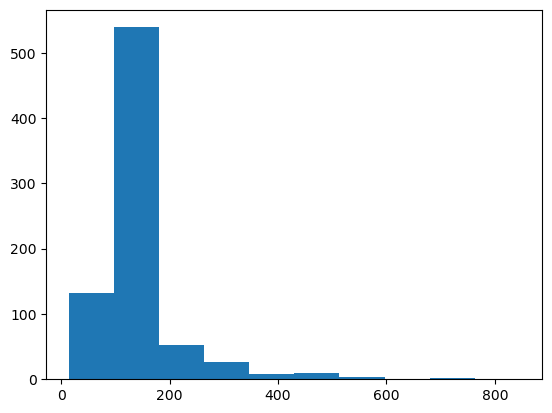

In [86]:
plt.hist(df['Insulin'])
plt.show() 

In [92]:
df['Insulin Range']=pd.cut(df['Insulin'],labels=['copper','gold','silver','platinum'],bins=[0,250,500,750,1000])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_BMI,BMI groups,Insulin Range
0,6.0,148.000000,72.0,35.000000,156.151194,33.600000,0.627,50.0,1.000000,1680.000000,"(32.604, 36.5]",copper
1,1.0,85.000000,66.0,29.000000,156.151194,26.600000,0.351,31.0,0.000000,824.600000,"(18.198999999999998, 27.8]",copper
2,8.0,183.000000,64.0,29.208413,156.151194,23.300000,0.672,32.0,1.000000,745.600000,"(18.198999999999998, 27.8]",copper
3,1.0,89.000000,66.0,23.000000,94.000000,28.100000,0.167,21.0,0.000000,590.100000,"(27.8, 32.604]",copper
4,0.0,137.000000,40.0,35.000000,168.000000,43.100000,2.288,33.0,1.000000,1422.300000,"(36.5, 67.1]",copper
...,...,...,...,...,...,...,...,...,...,...,...,...
771,7.0,159.000000,66.0,29.208413,156.151194,30.400000,0.383,36.0,0.351425,1094.400000,"(27.8, 32.604]",copper
772,0.0,137.000000,40.0,35.000000,168.000000,32.603714,2.288,33.0,1.000000,1075.922558,"(27.8, 32.604]",copper
773,4.0,83.000000,86.0,19.000000,156.151194,29.300000,0.317,34.0,0.000000,996.200000,"(27.8, 32.604]",copper
775,8.0,125.000000,96.0,29.208413,156.151194,32.603714,0.232,54.0,1.000000,1760.600550,"(27.8, 32.604]",copper


In [93]:
df[df['Insulin Range']=='platinum']

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_BMI,BMI groups,Insulin Range
13,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59.0,1.0,1775.9,"(27.8, 32.604]",platinum


In [95]:
df[['SkinThickness','BMI']][df['Insulin Range']=='gold']

,SkinThickness,BMI
53,34.000000,33.700000
54,42.000000,34.700000
56,39.000000,37.700000
73,20.000000,35.100000
111,26.000000,32.603714
144,31.000000,32.800000
153,42.000000,40.600000
162,34.000000,44.200000
186,36.000000,30.100000
199,27.000000,30.900000


In [98]:
df["Glucose"].mean()

121.79631624527386

In [97]:
df["Glucose"].std()

29.62639303474549